Random Forest es un algoritmo de aprendizaje automático supervisado que se basa en el aprendizaje conjunto. En este núcleo, construyo dos modelos de clasificador de bosque aleatorio para predecir la seguridad del automóvil, uno con 10 árboles de decisión y otro con 100 árboles de decisión. La precisión esperada aumenta con el número de árboles de decisión en el modelo. He demostrado el **proceso de selección de características** usando el modelo Random Forest para encontrar solo las características importantes, reconstruir el modelo usando estas características y ver su efecto en la precisión.

# **1. Introducción al algoritmo de bosque aleatorio** <a class="anchor" id="1"></a>

El bosque aleatorio es un algoritmo de aprendizaje supervisado. Tiene dos variaciones: una se usa para problemas de clasificación y otra para problemas de regresión. Es uno de los algoritmos más flexibles y fáciles de usar. Crea árboles de decisión a partir de las muestras de datos dadas, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación. También es un indicador bastante bueno de la importancia de las funciones.


El algoritmo de bosque aleatorio combina múltiples árboles de decisión, lo que da como resultado un bosque de árboles, de ahí el nombre "Bosque aleatorio". En el clasificador de bosque aleatorio, cuanto mayor sea el número de árboles en el bosque, mayor será la precisión.

# **2. Intuición del algoritmo de bosque aleatorio** <a class="anchor" id="2"></a>


La intuición del algoritmo de bosque aleatorio se puede dividir en dos etapas.


En la primera etapa, seleccionamos aleatoriamente "k" características del total de "m" características y construimos el bosque aleatorio. En la primera etapa, procedemos de la siguiente manera: -

1. Seleccione aleatoriamente `k` funciones de un total de `m` funciones donde `k < m`.
2. Entre las características `k`, calcule el nodo `d` usando el mejor punto de división.
3. Divida el nodo en nodos hijos utilizando la mejor división.
4. Repita de 1 a 3 pasos hasta alcanzar "l" número de nodos.
5. Construya un bosque repitiendo los pasos 1 a 4 durante "n" número de veces para crear "n" número de árboles.


En la segunda etapa, hacemos predicciones utilizando el algoritmo de bosque aleatorio entrenado.

1. Tomamos las características de prueba y utilizamos las reglas de cada árbol de decisión creado aleatoriamente para predecir el resultado y almacenar el resultado previsto.
2. Luego, calculamos los votos para cada objetivo previsto.
3. Finalmente, consideramos el objetivo predicho con mayor votación como la predicción final del algoritmo de bosque aleatorio.


![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

# **3. Ventajas y desventajas del algoritmo Random Forest** <a class="anchor" id="3"></a>


Las ventajas del algoritmo de bosque aleatorio son las siguientes: -


1. El algoritmo de bosque aleatorio se puede utilizar para resolver problemas tanto de clasificación como de regresión.
2. Se considera un modelo muy preciso y robusto porque utiliza una gran cantidad de árboles de decisión para hacer predicciones.
3. Los bosques aleatorios toman el promedio de todas las predicciones realizadas por los árboles de decisión, lo que anula los sesgos. Por lo tanto, no sufre el problema de sobreajuste.
4. El clasificador de bosque aleatorio puede manejar los valores faltantes. Hay dos formas de manejar los valores faltantes. El primero es utilizar valores medianos para reemplazar variables continuas y el segundo es calcular el promedio ponderado por proximidad de los valores faltantes.
5. Se puede utilizar un clasificador de bosque aleatorio para la selección de funciones. Significa seleccionar las funciones más importantes de las funciones disponibles del conjunto de datos de entrenamiento.


Las desventajas del algoritmo Random Forest se enumeran a continuación: -


1. La mayor desventaja de los bosques aleatorios es su complejidad computacional. Los bosques aleatorios son muy lentos a la hora de hacer predicciones porque se utiliza una gran cantidad de árboles de decisión para hacer predicciones. Todos los árboles del bosque tienen que hacer una predicción para la misma entrada y luego realizar una votación sobre ella. Por tanto, es un proceso que requiere mucho tiempo.
2. El modelo es difícil de interpretar en comparación con un árbol de decisiones, donde podemos hacer fácilmente una predicción en comparación con un árbol de decisiones.

# **4. Selección de funciones con bosques aleatorios** <a class="anchor" id="4"></a>
​
​
​
​
El algoritmo de bosques aleatorios se puede utilizar para el proceso de selección de características. Este algoritmo se puede utilizar para clasificar la importancia de las variables en un problema de regresión o clasificación.
​
​
Medimos la importancia de la variable en un conjunto de datos ajustando el algoritmo de bosque aleatorio a los datos. Durante el proceso de ajuste, el error de salida de bolsa para cada punto de datos se registra y se promedia en todo el bosque.
​
​
La importancia de la característica j-ésima se midió después del entrenamiento. Los valores de la característica j-ésima se permutaron entre los datos de entrenamiento y el error fuera de la bolsa se calculó nuevamente en este conjunto de datos perturbados. La puntuación de importancia para la característica j-ésima se calcula promediando la diferencia en el error fuera de la bolsa antes y después de la permutación en todos los árboles. La puntuación se normaliza por la desviación estándar de estas diferencias.
​
​
Las características que producen valores grandes para esta puntuación se clasifican como más importantes que las características que producen valores pequeños. Según esta puntuación, elegiremos las características más importantes y eliminaremos las menos importantes para la construcción del modelo.

# **5. Diferencia entre bosques aleatorios y árboles de decisión** <a class="anchor" id="5"></a>


Compararé bosques aleatorios con árboles de decisión. Algunas características destacadas de comparación son las siguientes: -

1. Los bosques aleatorios son un conjunto de múltiples árboles de decisión.

2. Los árboles de decisión son computacionalmente más rápidos en comparación con los bosques aleatorios.

3. Los árboles de decisión profundos pueden sufrir un sobreajuste. El bosque aleatorio evita el sobreajuste creando árboles en bosques aleatorios.

4. El bosque aleatorio es difícil de interpretar. Sin embargo, un árbol de decisiones es fácilmente interpretable y se puede convertir en reglas.

# **6. Relación con los vecinos más cercanos** <a class="anchor" id="6"></a>


Lin y Jeon señalaron una relación entre los bosques aleatorios y el algoritmo de k vecinos más cercanos en 2002. Resulta que ambos pueden verse como los llamados esquemas de vecindarios ponderados. Estos son modelos construidos a partir de un conjunto de entrenamiento que hace predicciones para nuevos puntos observando la vecindad del punto, formalizado mediante una función de peso.

# **Taller** <a class="anchor" id="6"></a>



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

# Análisis exploratorio


*   Cuantas variables
*   Si hay valores faltantes
*   Analisis balanceo




In [4]:
# Dar un vistazo de la base de datos
df.head() #Cuenta con 6 variables

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Tamaño de la base de datos
df.shape 

(1728, 7)

In [6]:
df.info() # No hay valores unicos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
# Observar los valores únicos de cada variable
df.apply(lambda x: x.unique())

0      [vhigh, high, med, low]
1      [vhigh, high, med, low]
2             [2, 3, 4, 5more]
3                 [2, 4, more]
4            [small, med, big]
5             [low, med, high]
6    [unacc, acc, vgood, good]
dtype: object

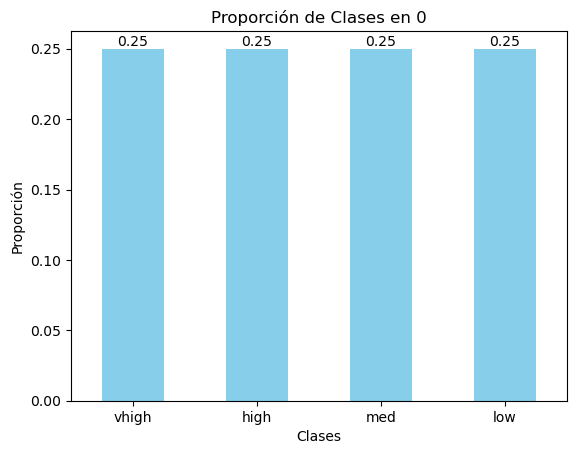

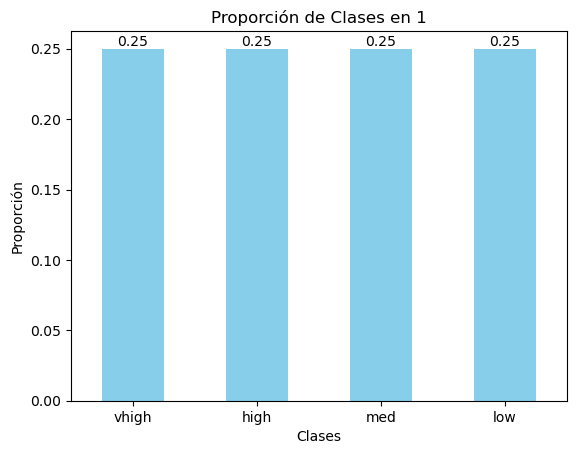

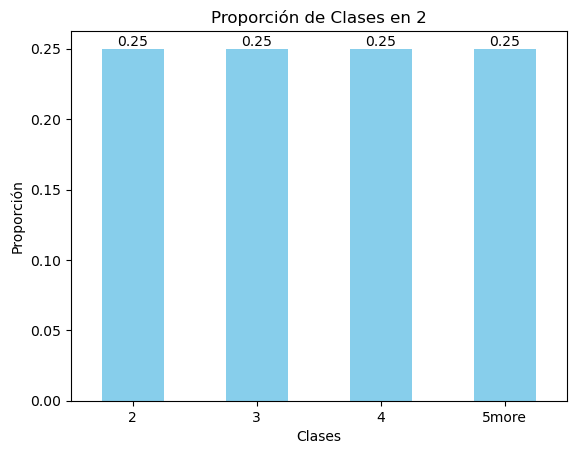

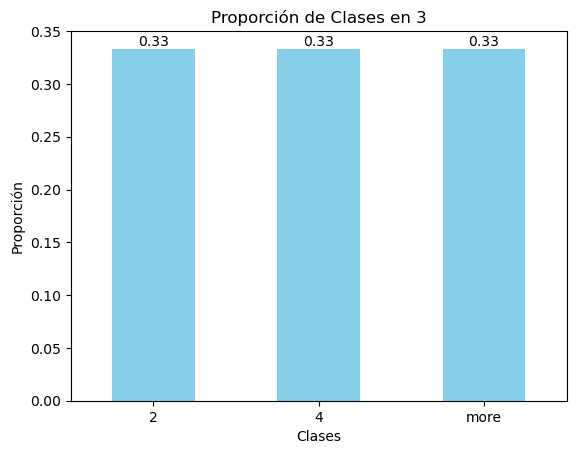

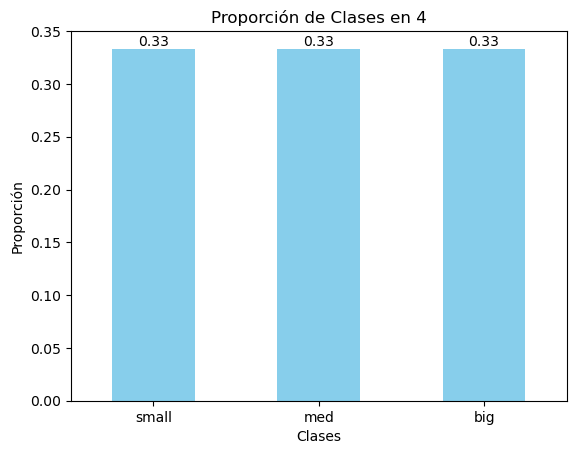

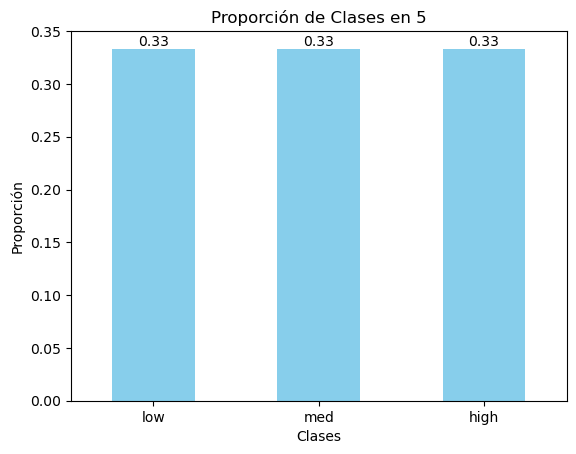

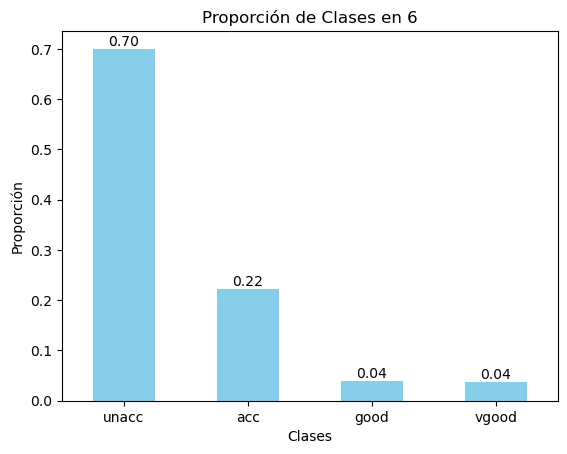

In [8]:

# Calcular proporciones y graficar para cada columna
for col in df.columns:
    proporciones = df[col].value_counts(normalize=True)
    
    plt.figure()
    ax = proporciones.plot(kind='bar', color='skyblue')
    plt.title(f'Proporción de Clases en {col}')
    plt.xlabel('Clases')
    plt.ylabel('Proporción')
    plt.xticks(rotation=0)
    
    # Añadir etiquetas a las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.show()

***Nota:*** Todas las variables muestran un balanceo perfecto, donde todas las clases tienen la misma cantidad de registros, a excepción de la variable 6, que muestra un desbalanceo notorio, donde una de las clases (unacc) representa el 70% de los registros.

# Split


***Nota:*** El modelo Random Forest requiere que sus variables sean numéricas. En este caso, todas las variables son categóricas ordinales. Por lo tanto, antes de realizar la división en conjuntos de entrenamiento y prueba, es necesario codificar las variables utilizando el método de Label Encoding. Este método no solo transforma las variables categóricas en valores numéricos, sino que se asegura que el modelo tenga en cuenta las relaciones ordinales entre las clases, lo que puede mejorar su capacidad para aprender patrones relevantes en los datos.

In [9]:
df_1 = df.copy() # Realizar copia para hacer la codificación sobre este

In [10]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding usando LabelEncoder
label_encoders = {}

for col in df_1.columns:
    le = LabelEncoder()
    # Ajustar y transformar la columna
    df_1[col] = le.fit_transform(df_1[col])
    label_encoders[col] = le  # Guardar el encoder si necesitas revertir la codificación más tarde

# Mostrar el DataFrame codificado
df_1.head()

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [11]:
X = df_1.drop(columns=df_1.columns[6])  # Predictoras
y = df_1.iloc[:, 6]  # Objetivo                  

***Nota***: El Random Forest, tiene como requisito que susu variables sean numericas, y en este caso todas las variables con categoricas ordinales, y no estan esperesadas nuemicament, por lo tanto antes de hacer el plit se codificaran las varibales a traves de metood de label encondign con la intencion de mantner su oden.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Modelos

## **Random Forest**

### Entrenamiento

In [14]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9545


### Métricas adicionales

***Nota:*** Dado que la variable objetivo presenta un desbalance en las clases, utilizar únicamente la métrica de precisión no es adecuado, ya que puede ofrecer una visión sesgada del rendimiento del modelo, favoreciendo la clase mayoritaria. Para obtener una evaluación más completa, se incorporan otras métricas como la precisión, el recall y la matriz de confusión. Además, se incluyen métricas específicas para problemas de clasificación multiclase, lo que permite tener una visión más amplia y detallada del desempeño del modelo.

Precision (weighted): 0.9560
Recall (weighted): 0.9545
F1 Score (weighted): 0.9547


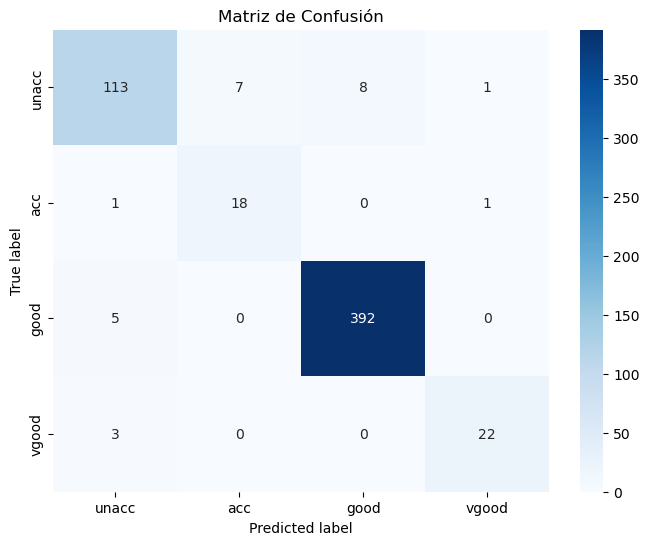

Informe de Clasificación:
              precision    recall  f1-score   support

       unacc       0.93      0.88      0.90       129
         acc       0.72      0.90      0.80        20
        good       0.98      0.99      0.98       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.89      0.91      0.90       571
weighted avg       0.96      0.95      0.95       571



In [15]:
# Importar las librerías necesarias
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular las métricas
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Mostrar las métricas

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
#print(f"AUC-ROC: {roc_auc:.4f}")

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unacc', 'acc', 'good', 'vgood'], yticklabels=['unacc', 'acc', 'good', 'vgood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Informe de Clasificación:")
print(report)


## **XGBoost**

***Nota:*** A pesar de que ambos son métodos de ensamblaje, sus enfoques para mejorar la precisión del modelo son distintos. Random Forest utiliza el método de "bagging" para combinar múltiples árboles de decisión, lo que reduce la varianza y mitiga el riesgo de sobreajuste. Por otro lado, XGBoost se basa en el "boosting", donde cada nuevo árbol se construye para corregir los errores de los árboles anteriores, lo que puede resultar en un ajuste más fino y una mayor capacidad para capturar patrones complejos en los datos. Además, dado que nuestras clases objetivo están desbalanceadas, es crucial evaluar ambos modelos para identificar cuál maneja mejor esta desventaja y ofrece un rendimiento superior en términos de precisión, recall y F1-Score, asegurando así una clasificación más robusta y eficiente en el contexto de nuestro conjunto de datos.

### Entrenamiento

In [16]:
from xgboost import XGBClassifier

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_model.fit(X_train, y_train)

# Predecir los resultados del conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Exactitud del modelo XGBoost: {accuracy:.4f}')

Exactitud del modelo XGBoost: 0.9755


### Métricas

Precision (weighted): 0.9796
Recall (weighted): 0.9755
F1 Score (weighted): 0.9767


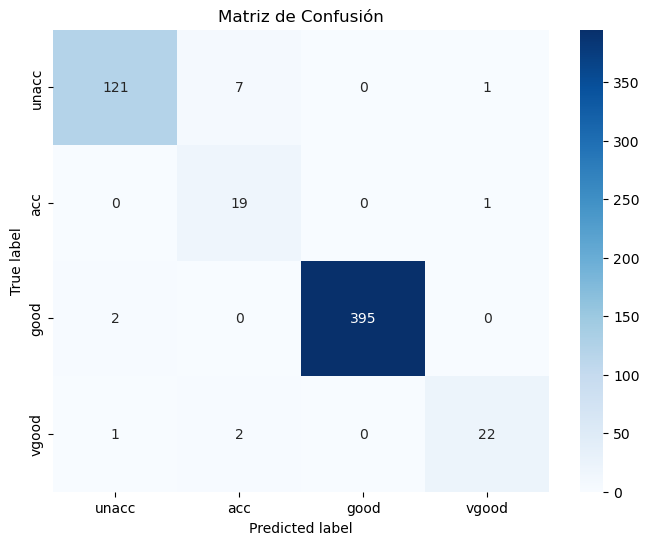

Informe de Clasificación:
              precision    recall  f1-score   support

       unacc       0.98      0.94      0.96       129
         acc       0.68      0.95      0.79        20
        good       1.00      0.99      1.00       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.98       571
   macro avg       0.89      0.94      0.91       571
weighted avg       0.98      0.98      0.98       571



In [17]:
# Calcular las métricas
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Mostrar las métricas

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
#print(f"AUC-ROC: {roc_auc:.4f}")

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unacc', 'acc', 'good', 'vgood'], yticklabels=['unacc', 'acc', 'good', 'vgood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_xgb, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Informe de Clasificación:")
print(report)


#### Comparación entre Random Forest y XGBoost

Al comparar ambos modelos, se observa que XGBoost supera a Random Forest en todas las métricas de rendimiento. La exactitud del modelo XGBoost (97.55%) es significativamente más alta que la del modelo Random Forest (95.45%). Además, XGBoost muestra una mejor capacidad para manejar las clases desbalanceadas, ya que su precisión y recall en las clases menos frecuentes son superiores.

Ademas por parte del F1 Score ponderado, en donde para el XGBoost es 97.67%, valor que refleja un rendimiento superior en comparación con Random Forest (95.47%).ESta métrica es importante ya que F1 Score más alto indica que el modelo no solo está haciendo predicciones correctas, sino que también está capturando adecuadamente las instancias relevantes sin clasificar incorrectamente muchas instancias de otras clases.

Aunque ambos modelos son efectivos, XGBoost proporciona un rendimiento superior, especialmente en situaciones donde las clases están desbalanceadas y se requiere una mayor precisión en la clasificación. 

# Encuentre características importantes con el modelo Random Forest

Hasta ahora, he utilizado todas las funciones proporcionadas en el modelo.


*   seleccione solo las características importantes, construiré el modelo usando estas características y veré su efecto en la precisión.
*   pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
*   sns.barplot(x=feature_scores, y=feature_scores.index)



## **Random Forest**

Importancias de características:
5    0.265392
3    0.222230
0    0.201751
1    0.154568
4    0.089286
2    0.066773
dtype: float64


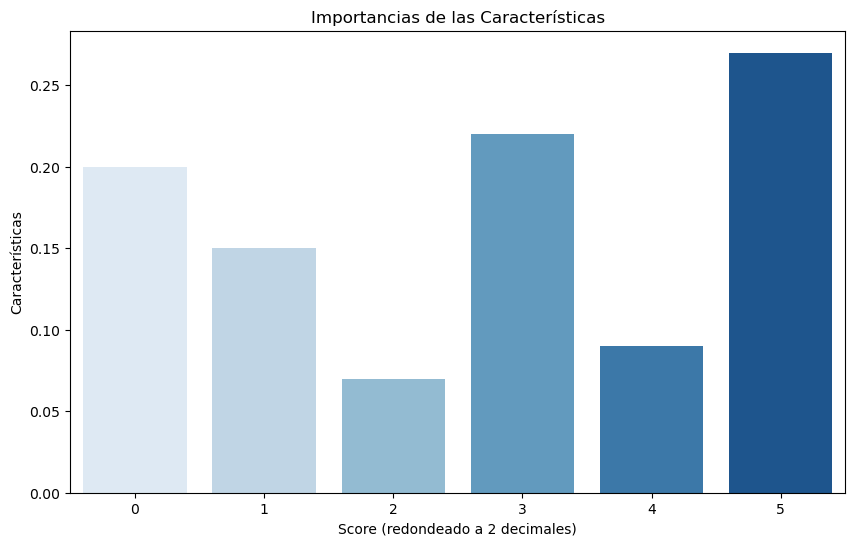

In [18]:
# Obtener las importancias de las características
importances = rfc.feature_importances_

# Crear un DataFrame para las importancias
feature_scores = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Mostrar las características importantes
print("Importancias de características:")
print(feature_scores)

# Redondear los valores a dos decimales
feature_scores_rounded = feature_scores.round(2)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=feature_scores_rounded.index, y=feature_scores_rounded, palette='Blues')
plt.title('Importancias de las Características')
plt.xlabel('Score (redondeado a 2 decimales)')
plt.ylabel('Características')
plt.show()

In [19]:
# Seleccionar características importantes (por ejemplo, las que tienen una importancia mayor que 0.1)
selected_features = feature_scores[feature_scores > 0.1].index

# Reentrenar el modelo usando solo las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Reentrenar el modelo
rfc_selected = RandomForestClassifier(random_state=0)
rfc_selected.fit(X_train_selected, y_train)

# Predecir y calcular la precisión
y_pred_selected = rfc_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_selected)

print(f'Precisión del modelo con características seleccionadas: {accuracy:.4f}')

Precisión del modelo con características seleccionadas: 0.8494


Precision (weighted): 0.9796
Recall (weighted): 0.9755
F1 Score (weighted): 0.9767


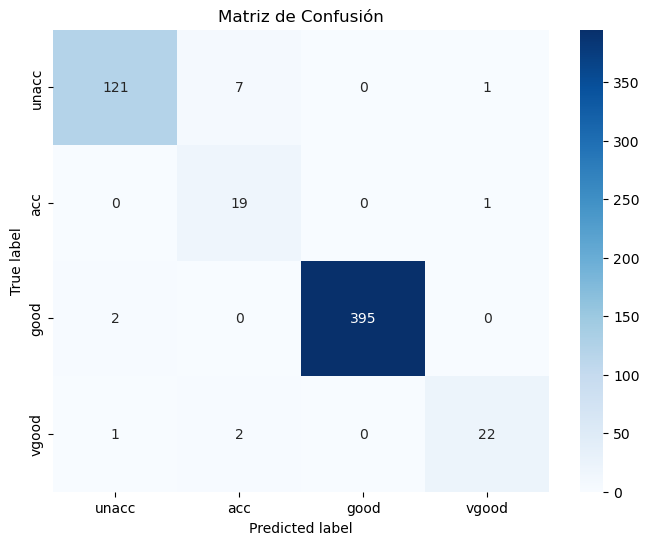

Informe de Clasificación:
              precision    recall  f1-score   support

       unacc       0.98      0.94      0.96       129
         acc       0.68      0.95      0.79        20
        good       1.00      0.99      1.00       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.98       571
   macro avg       0.89      0.94      0.91       571
weighted avg       0.98      0.98      0.98       571



In [20]:
# Calcular las métricas
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Mostrar las métricas

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
#print(f"AUC-ROC: {roc_auc:.4f}")

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unacc', 'acc', 'good', 'vgood'], yticklabels=['unacc', 'acc', 'good', 'vgood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_xgb, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Informe de Clasificación:")
print(report)


### Afectación de la selección de características

Con las características seleccionadas, la precisión del modelo Random Forest fue de 0.8494, lo que indica una disminución respecto a la precisión anterior. A pesar de esta reducción, la precisión ponderada (0.9796) y el recall ponderado (0.9755) mostraron resultados consistentes, sugiriendo que el modelo mantiene su capacidad para clasificar correctamente las instancias, especialmente en las clases más críticas. El F1 Score ponderado se mantuvo alto en 0.9767, lo que refleja un buen equilibrio entre precisión y recall. Esto indica que, aunque la precisión general del modelo ha disminuido, la selección de características ha permitido al modelo ser más eficiente y efectivo en la clasificación de las instancias más relevantes.

## **XGBoost**

Importancias de características:
5    0.336246
3    0.288588
1    0.144955
0    0.122562
4    0.072765
2    0.034884
dtype: float32


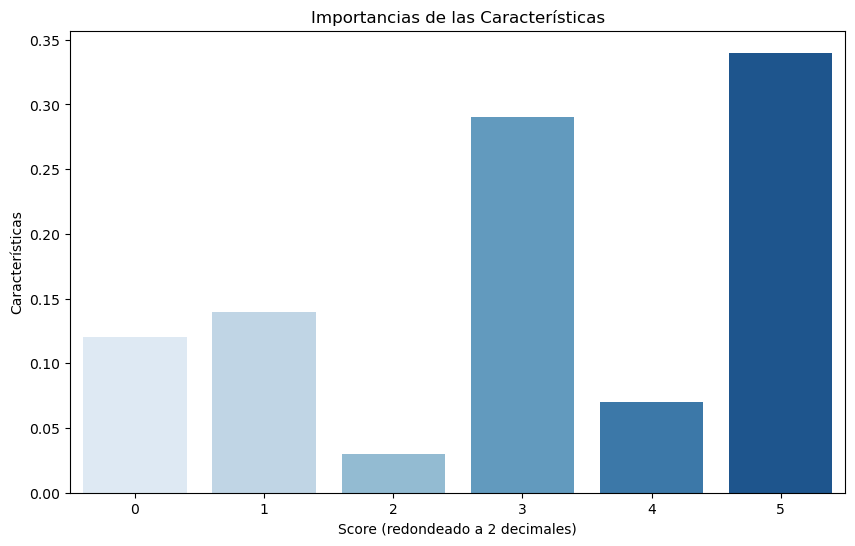

In [21]:
# Obtener las importancias de las características
importances = xgb_model.feature_importances_

# Crear un DataFrame para las importancias
feature_scores = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Mostrar las características importantes
print("Importancias de características:")
print(feature_scores)

# Redondear los valores a dos decimales
feature_scores_rounded = feature_scores.round(2)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=feature_scores_rounded.index, y=feature_scores_rounded, palette='Blues')
plt.title('Importancias de las Características')
plt.xlabel('Score (redondeado a 2 decimales)')
plt.ylabel('Características')
plt.show()

plt.show()

In [22]:
# Seleccionar características importantes (por ejemplo, las que tienen una importancia mayor que 0.1)
selected_features = feature_scores[feature_scores > 0.1].index

# Reentrenar el modelo usando solo las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Reentrenar el modelo
xgb_model_selected = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_model_selected.fit(X_train_selected, y_train)

# Predecir y calcular la precisión
y_pred_selected = xgb_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f'Exactitud del modelo XGBoost con características seleccionadas: {accuracy_selected:.4f}')

Exactitud del modelo XGBoost con características seleccionadas: 0.8546


Precision (weighted): 0.9796
Recall (weighted): 0.9755
F1 Score (weighted): 0.9767


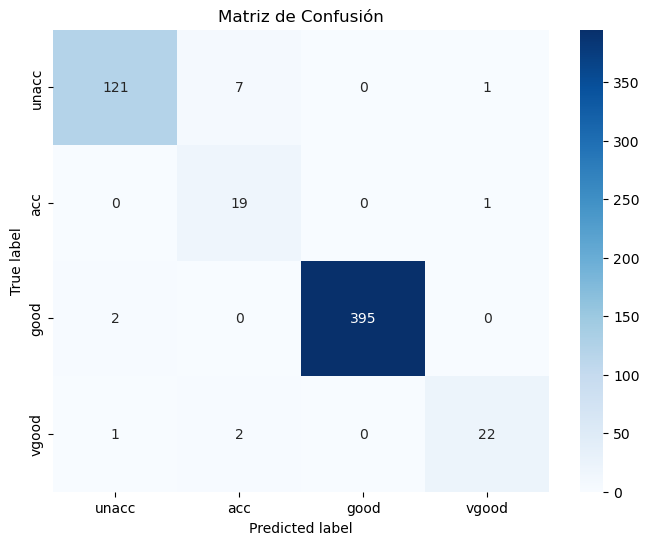

Informe de Clasificación:
              precision    recall  f1-score   support

       unacc       0.98      0.94      0.96       129
         acc       0.68      0.95      0.79        20
        good       1.00      0.99      1.00       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.98       571
   macro avg       0.89      0.94      0.91       571
weighted avg       0.98      0.98      0.98       571



In [23]:
# Calcular las métricas
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Mostrar las métricas

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
#print(f"AUC-ROC: {roc_auc:.4f}")

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unacc', 'acc', 'good', 'vgood'], yticklabels=['unacc', 'acc', 'good', 'vgood'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
report = classification_report(y_test, y_pred_xgb, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Informe de Clasificación:")
print(report)


### Afectación en la selección de características

El modelo XGBoost alcanzó una precisión de 0.8546, que es ligeramente superior a la de Random Forest. Al igual que en Random Forest, la precisión ponderada (0.9796) y el recall ponderado (0.9755) fueron excelentes, y el F1 Score ponderado también se mantuvo en 0.9767. Esto sugiere que XGBoost no solo retiene su capacidad de generalización sino que también se beneficia de las características seleccionadas, mostrando un rendimiento superior en la clasificación general.

# Resultados y conclusión

- Ambos modelos son efectivos para la clasificación, pero XGBoost se destaca por su mejor manejo de características y su mayor precisión general.

- Al comparar ambos modelos, se observa que la selección de características ha tenido un impacto positivo en ambos, pero XGBoost mantiene una ligera ventaja en términos de precisión general. La capacidad de XGBoost para identificar y priorizar características importantes, como se refleja en la mayor importancia asignada a las primeras características, sugiere que el modelo está mejor sintonizado para la clasificación efectiva de las instancias. Además, la consistencia en las métricas de precisión y recall entre ambos modelos indica que, aunque Random Forest es un competidor sólido, XGBoost ofrece un rendimiento superior y es más robusto frente a variaciones en los datos.

- Este análisis subraya la importancia de la selección de características en el modelado, ya que mejora la interpretabilidad y la eficiencia de los modelos sin comprometer significativamente el rendimiento en tareas de clasificación.